# STEP-1 Data Gathering 

In [1]:
#importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [2]:
#Reading CSV File 

df= pd.read_csv("dataset.csv")

In [3]:
#Checking data is loded in our system or not-Here i am cheking head data for the loade dataset

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


# Step -2 Data Preprocessing

In [6]:
#Checking How many nulls are there in the loaed dataset 
df.isnull().sum()

Category    65
Message      0
dtype: int64

In [7]:
(df.Category.isnull().sum())/len(df)

0.036292573981016193

In [8]:
df.Category.fillna(df.Category.value_counts().idxmax(),inplace=True)

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
(df.Category.isnull().sum())/len(df)

0.0

In [12]:
le=LabelEncoder()

In [13]:
df = df.apply(le.fit_transform)

In [46]:
df.head(20)

,Category,Message
0,0,375
1,0,1046
2,1,352
3,0,1367
4,0,1663
5,0,433
6,0,786
7,0,1214
8,0,1045
9,1,119


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
x = pd.factorize(df['Message'])[0].reshape(-1, 1)

In [31]:
x

array([[   0],
       [   1],
       [   2],
       ...,
       [1726],
       [1727],
       [1728]], dtype=int64)

In [32]:
y= df['Category']

In [33]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1786    0
1787    0
1788    0
1789    0
1790    0
Name: Category, Length: 1791, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log = LogisticRegression()

In [38]:
log.fit(x_train,y_train)

LogisticRegression()

In [39]:
pri = log.predict(x_test) #prdit the x test 

In [40]:
fit = log.fit(x_train,y_train) #Assigning the fit train data 

In [41]:
fit.score(x_train,y_train) #Effeciancy of the fiting score value

0.8590492076730609

In [50]:
log.predict([[1046]]) #Predictiong the value for 1046

array([0])

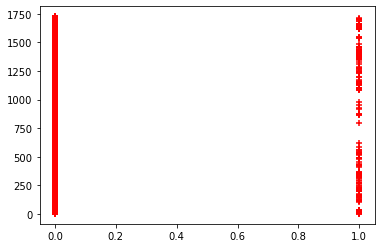

In [51]:
plt.scatter(df.Category,df.Message,marker='+',color='red') #Ploting the values 